# Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
# import data
df = pd.read_csv('/home/sarangm/snap/opera/225/Downloads/Surgical-deepnet.csv')
df.sample(5)

bmi   Age  asa_status  baseline_cancer  baseline_charlson  \
1345   23.74  55.5           0                0                  0   
12664  33.21  62.2           1                1                  2   
12789  31.59  60.8           1                1                  3   
14591  30.24  22.6           0                0                  0   
10736  40.33  43.0           1                1                  3   

       baseline_cvd  baseline_dementia  baseline_diabetes  baseline_digestive  \
1345              0                  0                  0                   0   
12664             0                  0                  0                   0   
12789             1                  0                  1                   0   
14591             0                  0                  0                   0   
10736             1                  0                  0                   0   

       baseline_osteoart  ...  complication_rsi  dow  gender   hour  month  \
1345                   0  ...              0.00    0       0   9.90      6   
12664                  0  ...             -0.50    2       1  14.12      8   
12789                  0  ...             -0.26    2       1  12.40      8   
14591                  0  ...              0.93    3       1  14.40      9   
10736                  0  ...             -0.33    4       0  11.65      1   

       moonphase  mort30  mortality_rsi  race  complication  
1345           1       0           0.15     0             0  
12664          2       0          -0.72     1             1  
12789          0       0          -0.78     1             1  
14591          0       0           0.36     1             1  
10736          1       0          -1.35     1             0  

[5 rows x 25 columns]

In [39]:
#check for duplicates in the data
df.duplicated().sum()

2902

In [40]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

df.reset_index()

#describe the data
df.describe(include='all').T

count       mean        std       min        25%  \
bmi                  11733.0  31.868385   9.014059  2.150000  25.390000   
Age                  11733.0  56.577951  13.660028  6.100000  47.000000   
asa_status           11733.0   0.541379   0.567410  0.000000   0.000000   
baseline_cancer      11733.0   0.327197   0.469210  0.000000   0.000000   
baseline_charlson    11733.0   1.219296   1.887267  0.000000   0.000000   
baseline_cvd         11733.0   0.526379   0.499325  0.000000   0.000000   
baseline_dementia    11733.0   0.006051   0.077558  0.000000   0.000000   
baseline_diabetes    11733.0   0.150771   0.357841  0.000000   0.000000   
baseline_digestive   11733.0   0.236427   0.424906  0.000000   0.000000   
baseline_osteoart    11733.0   0.180176   0.384350  0.000000   0.000000   
baseline_psych       11733.0   0.102787   0.303693  0.000000   0.000000   
baseline_pulmonary   11733.0   0.117361   0.321864  0.000000   0.000000   
ahrq_ccs             11733.0   9.265831   6.573821  0.000000   4.000000   
ccsComplicationRate  11733.0   0.146330   0.094482  0.016118   0.081977   
ccsMort30Rate        11733.0   0.004814   0.005047  0.000000   0.000789   
complication_rsi     11733.0  -0.384690   1.318841 -4.720000  -0.900000   
dow                  11733.0   2.004432   1.414689  0.000000   1.000000   
gender               11733.0   0.437314   0.496076  0.000000   0.000000   
hour                 11733.0  10.431716   2.912697  6.070000   7.680000   
month                11733.0   5.399812   3.428132  0.000000   3.000000   
moonphase            11733.0   1.480695   1.113063  0.000000   0.000000   
mort30               11733.0   0.004943   0.070138  0.000000   0.000000   
mortality_rsi        11733.0  -0.487154   1.078118 -3.820000  -1.200000   
race                 11733.0   0.899514   0.404809  0.000000   1.000000   
complication         11733.0   0.314498   0.464335  0.000000   0.000000   

                           50%        75%        max  
bmi                  29.860000  37.220000  92.590000  
Age                  56.800000  68.700000  90.000000  
asa_status            1.000000   1.000000   2.000000  
baseline_cancer       0.000000   1.000000   1.000000  
baseline_charlson     0.000000   2.000000  13.000000  
baseline_cvd          1.000000   1.000000   1.000000  
baseline_dementia     0.000000   0.000000   1.000000  
baseline_diabetes     0.000000   0.000000   1.000000  
baseline_digestive    0.000000   0.000000   1.000000  
baseline_osteoart     0.000000   0.000000   1.000000  
baseline_psych        0.000000   0.000000   1.000000  
baseline_pulmonary    0.000000   0.000000   1.000000  
ahrq_ccs              8.000000  14.000000  21.000000  
ccsComplicationRate   0.109369   0.183370   0.466129  
ccsMort30Rate         0.002764   0.007398   0.016673  
complication_rsi     -0.330000   0.000000  12.560000  
dow                   2.000000   3.000000   4.000000  
gender                0.000000   1.000000   1.000000  
hour                  9.800000  12.720000  18.920000  
month                 6.000000   8.000000  11.000000  
moonphase             1.000000   2.000000   3.000000  
mort30                0.000000   0.000000   1.000000  
mortality_rsi        -0.270000   0.080000   4.400000  
race                  1.000000   1.000000   2.000000  
complication          0.000000   1.000000   1.000000

In [42]:
#splitting the data as independent and dependent variables
X = df.drop('complication', axis=1)
y = df['complication']

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y_train.value_counts(normalize=True)

0    0.685499
1    0.314501
Name: complication, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

0    0.685511
1    0.314489
Name: complication, dtype: float64

# Decision Tree

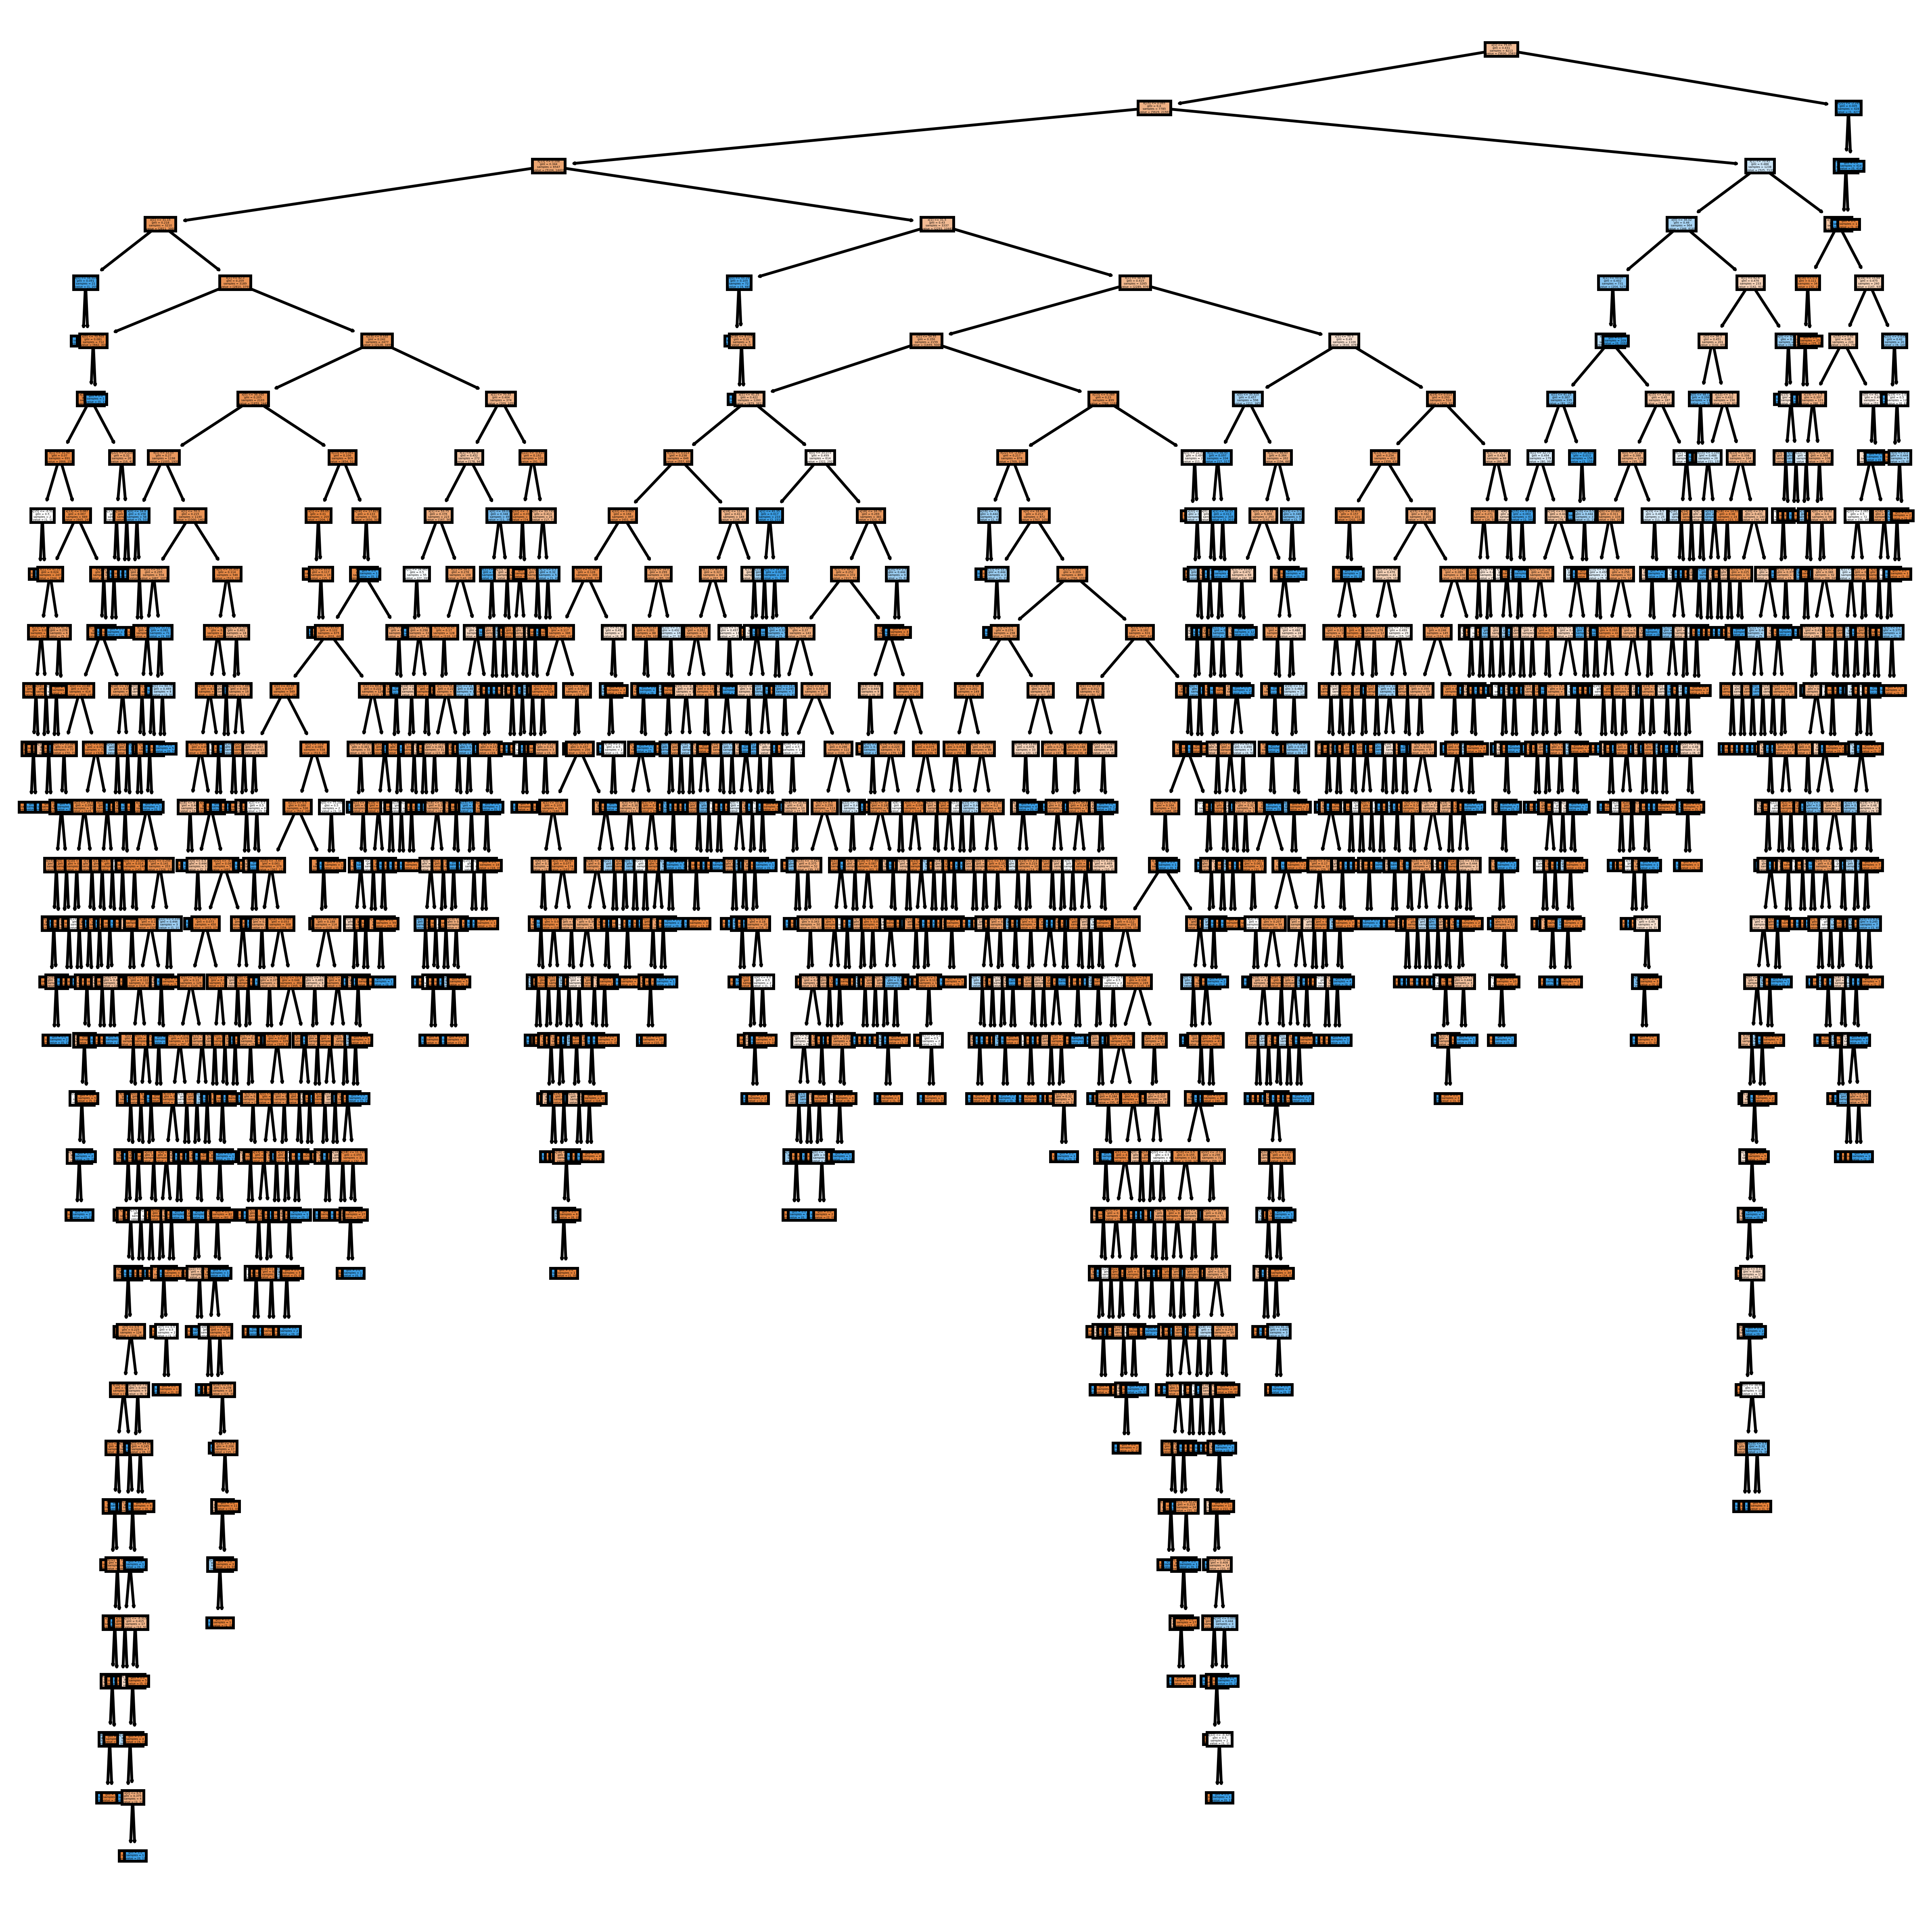

In [44]:
#Decision Tree
#create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, verbose=1)

#fit data to model
dtc.fit(X_train, y_train)

#import libraries to plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5630
           1       1.00      1.00      1.00      2583

    accuracy                           1.00      8213
   macro avg       1.00      1.00      1.00      8213
weighted avg       1.00      1.00      1.00      8213



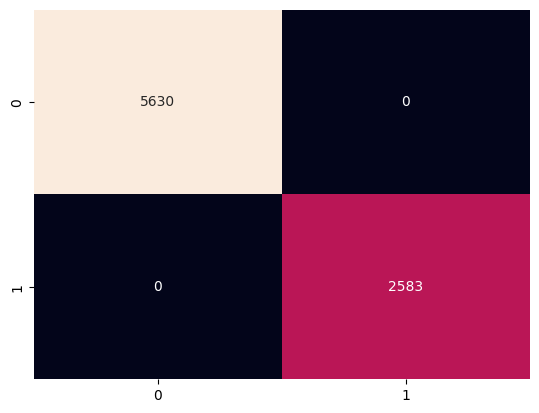

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2413
           1       0.70      0.74      0.72      1107

    accuracy                           0.82      3520
   macro avg       0.79      0.80      0.79      3520
weighted avg       0.82      0.82      0.82      3520



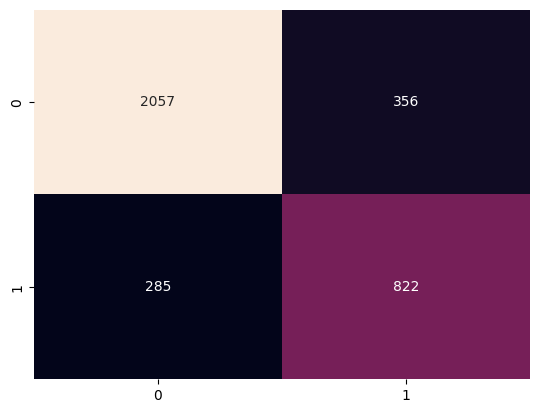

In [45]:
#import libraries to evaulate the model
from sklearn.metrics import classification_report, confusion_matrix
#predict the class from the model
ytrain_pred = dtc.predict(X_train)
#evaluate the model
print(classification_report(y_train, ytrain_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()
print("------------------------------------------------------")
#predict the class from the model on the test data
ytest_pred = dtc.predict(X_test)
#evaluate the model on the test data
print(classification_report(y_test, ytest_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

In [26]:
#find cost complexity pruning path for the decision tree
path=dtc.cost_complexity_pruning_path(X_train, y_train)
alpha = path['ccp_alphas']

### Gradient Boosting

In [63]:
#Gradient boosting
#create a gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=788, n_estimators=1000, learning_rate=0.2, max_depth=2, min_samples_leaf=9, verbose=1)

#fit data to model
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1760           15.00s
         2           1.1318           17.58s
         3           1.1013           18.52s
         4           1.0692           19.44s
         5           1.0485           19.29s
         6           1.0290           20.00s
         7           1.0123           22.44s
         8           0.9971           25.31s
         9           0.9842           24.37s
        10           0.9732           24.51s
        20           0.8477           21.53s
        30           0.7746           19.15s
        40           0.7173           18.58s
        50           0.6846           17.97s
        60           0.6630           17.73s
        70           0.6446           17.03s
        80           0.6334           16.35s
        90           0.6234           15.68s
       100           0.6144           15.14s
       200           0.5593           14.73s
       300           0.5239           13.10s
       40

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_leaf=9,
                           n_estimators=1000, random_state=788, verbose=1)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5630
           1       0.98      0.79      0.87      2583

    accuracy                           0.93      8213
   macro avg       0.94      0.89      0.91      8213
weighted avg       0.93      0.93      0.93      8213



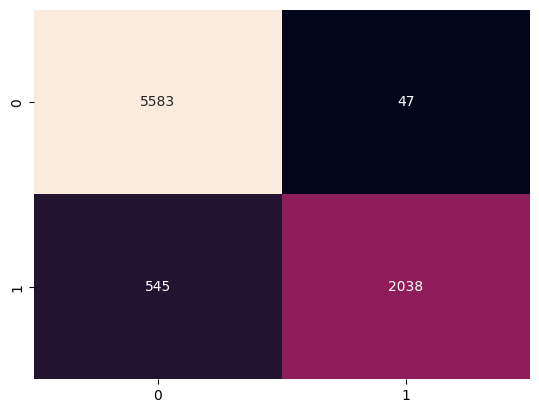

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2413
           1       0.89      0.69      0.78      1107

    accuracy                           0.88      3520
   macro avg       0.88      0.83      0.85      3520
weighted avg       0.88      0.88      0.87      3520



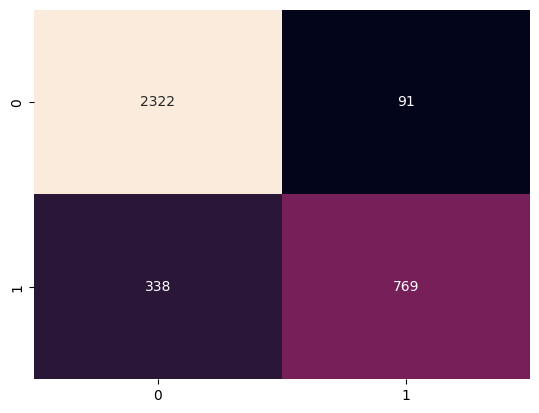

In [64]:
#predict the class from the model
ytrain_pred = gbc.predict(X_train)
#evaluate the model
print(classification_report(y_train, ytrain_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()
print("------------------------------------------------------")
#predict the class from the model on the test data
ytest_pred = gbc.predict(X_test)
#evaluate the model on the test data
print(classification_report(y_test, ytest_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

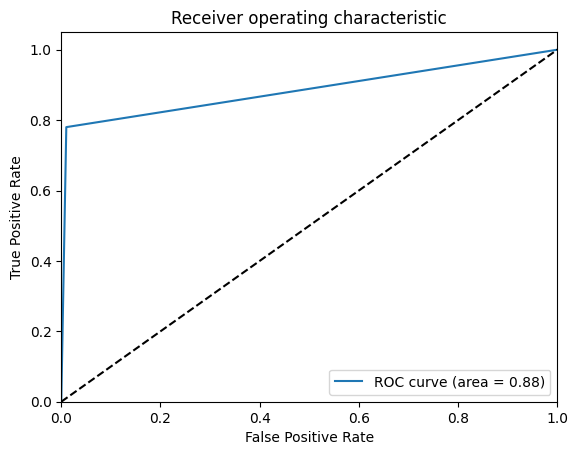

------------------------------------------------------


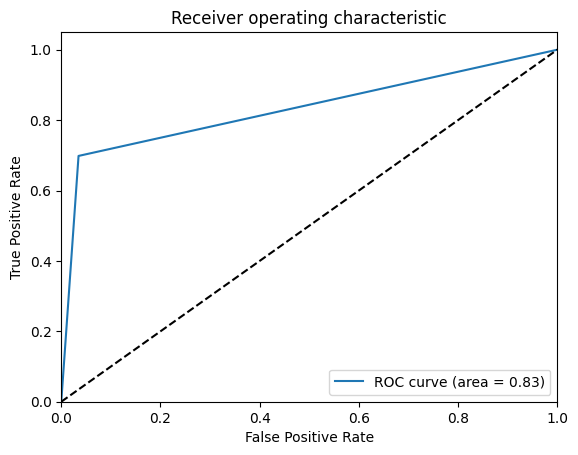

In [58]:
#import libraries to evaulate the model
from sklearn.metrics import roc_curve, roc_auc_score

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       317
           1       0.96      0.92      0.94       166

    accuracy                           0.96       483
   macro avg       0.96      0.95      0.95       483
weighted avg       0.96      0.96      0.96       483



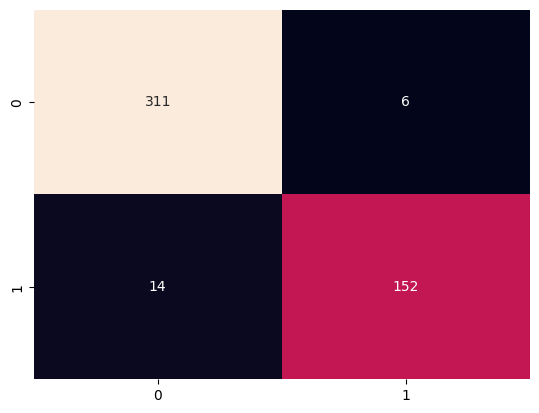

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.96      0.93      0.94        72

    accuracy                           0.96       208
   macro avg       0.96      0.95      0.96       208
weighted avg       0.96      0.96      0.96       208



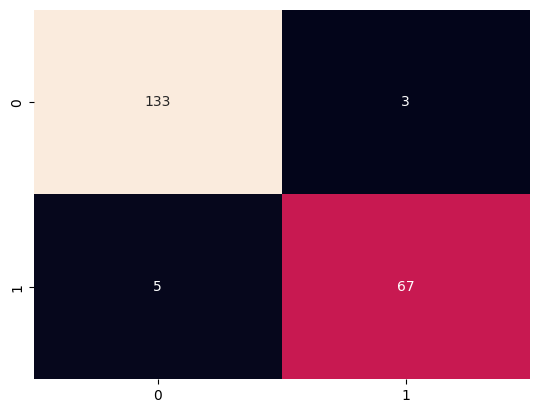

In [ ]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

In [ ]:
!

# Random Forest

In [20]:
#Random Forest
#create a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

#fit data to model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



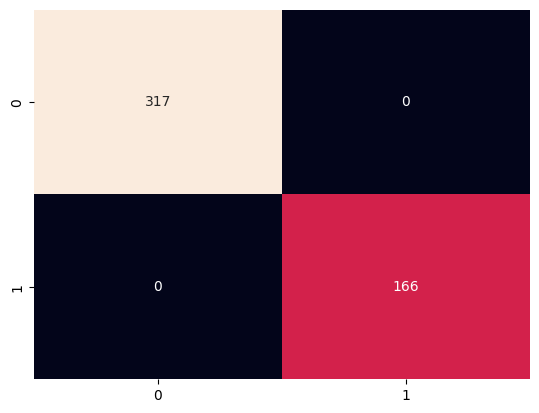

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       136
           1       0.95      0.96      0.95        72

    accuracy                           0.97       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.97      0.97      0.97       208



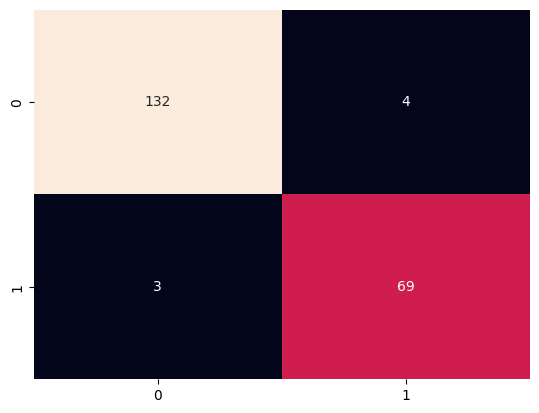

In [21]:
#evaluate the model
ytrain_pred = rfc.predict(X_train)

#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = rfc.predict(X_test)

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

### Gridsearch

In [22]:
#grid search for hyperparameter tuning on Random forest
param_grid = {'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'n_estimators': np.arange(10,200,20),
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs': [-1],
              'oob_score': [True, False],
              'verbose' : [1],
              'warm_start': [True, False]}

#initialize the grid search object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/home/sarangm/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 90, 'n_jobs': -1, 'oob_score': False, 'verbose': 1, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.1s finished


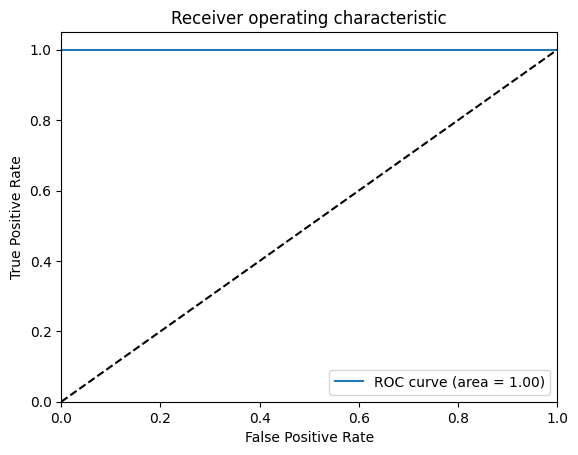

------------------------------------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


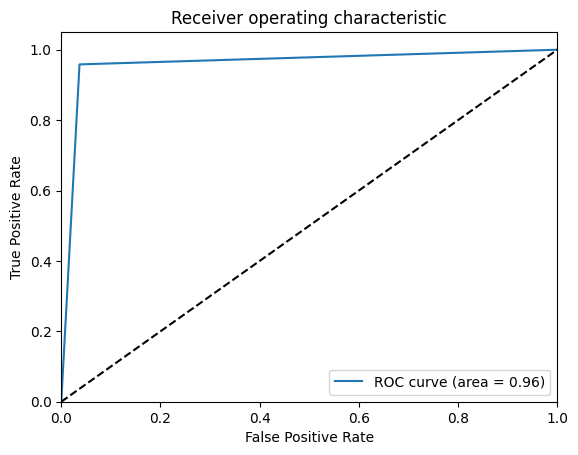

In [23]:
#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



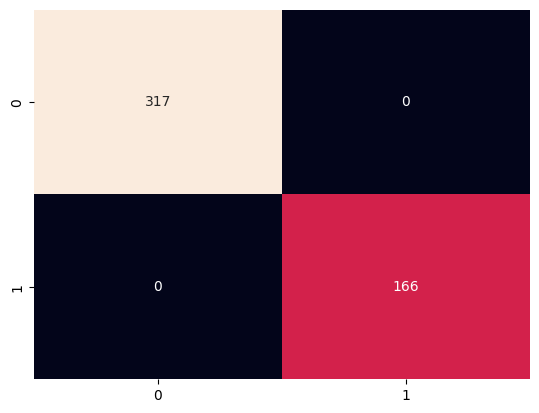

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.93      0.96      0.95        72

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



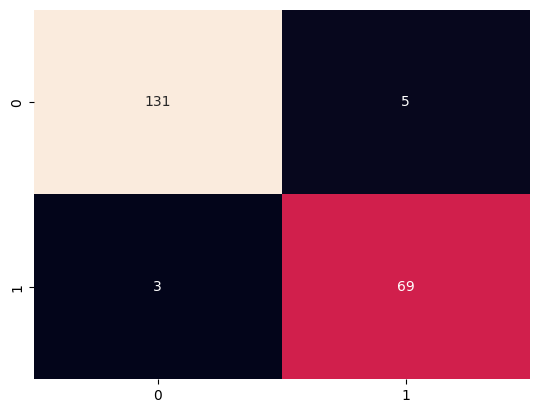

In [24]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()